In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay


In [3]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Nov 20 14:30 sample_data


## Let's try to put it all into practice

We will use a german credit reisk dataset that classifies people into good or bad risks from:
https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

First we will need to load our data (you will also need to upload the data to colab first):

In [2]:
# Load the CSV file into a DataFrame
data = pd.read_csv('4_german_credit_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: '4_german_credit_data.csv'

After loading the dataset, it's essential to get a quick overview of its characteristics, such as the number of rows and columns, the data types of the columns, and basic statistics of numerical columns.

In [3]:
data.head()

,CheckingAccountStatus,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccountBonds,PresentEmploymentSince,InstallmentRatePercentage,PersonalStatusSex,OtherDebtorsGuarantors,...,Property,Age,OtherInstallmentPlans,Housing,NumberOfExistingCredits,Job,NumberOfPeopleBeingLiable,Telephone,ForeignWorker,CreditRisk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


What we can see is that the dataset contains 21 columns: 20 features and 1 target column (CreditRisk).
Features are a mix of categorical (e.g., CheckingAccountStatus, CreditHistory) and numerical (e.g., Duration, CreditAmount) data types.
The target column CreditRisk has two classes: 1 (Good Risk) and 2 (Bad Risk).



Let's pick some features:

* Duration: As we observed, it has a positive correlation with the target variable.
* Amount: The amount of the loan can be an indicator of risk.
* Age: Age might play a role in determining creditworthiness.
* CheckingAccountStatus: As seen in the plot, different levels of checking account status have different risk distributions.
* CreditHistory: The credit history of a person can be a significant indicator of their credit risk.
* Purpose: The purpose of the loan can influence the risk associated with it.
* SavingsAccountBonds: Savings can be an indicator of financial stability.

In [4]:
# Identify numerical and categorical columns
numeric_features = ['Duration', 'CreditAmount', 'Age']
categorical_features = ['CheckingAccountStatus', 'CreditHistory', 'Purpose', 'SavingsAccountBonds']

# Selecting initial set of features
selected_features = numeric_features + categorical_features

In [5]:
print(selected_features)

['Duration', 'CreditAmount', 'Age', 'CheckingAccountStatus', 'CreditHistory', 'Purpose', 'SavingsAccountBonds']


Let's create our data for ML:

In [6]:
X = data[selected_features]
y = data['CreditRisk'] - 1  # Convert to 0 and 1

We are going to apply one-hot encoding to the categorical features.

One-Hot Encoding is a method used to convert categorical data variables so they can be provided to machine learning algorithms to improve predictions. Machine learning algorithms cannot work with categorical data directly. Categorical data must be converted to numbers. One of the most common ways to do this transformation is by using one-hot encoding.

How It Works:
Identify Unique Categories: For each categorical variable, identify the unique categories it can take.

Create New Columns: For each unique category, a new binary (0 or 1) column is created.

Binary Indication:

For each record, the column corresponding to the category the variable takes value will have a '1', and all other new columns will have a '0'.
This means that out of all the new columns for a categorical variable, only one can take the value '1' for a given record.

**Important** One drawback of one-hot encoding is that it can increase the dimensionality of the dataset significantly if the categorical variable has many unique values.
It can also lead to multicollinearity, a situation where two or more variables are highly correlated. In the context of one-hot encoding, one variable can be predicted from the others. This is called the dummy variable trap.
To avoid the dummy variable trap, one common practice is to drop one of the one-hot encoded columns (hence, for a variable with n categories, we keep n−1 dummy columns).

This time we will use onehotencoder from scikitlearn and note that logistic regression will have a problem with multicolinearity.

`OneHotEncoder` is used to convert categorical data into a binary matrix. It creates one column for each unique category in the data, and for each sample, only the column corresponding to its category will have a value of 1 (all other columns are 0).

**Use Case:** OneHotEncoder is commonly used when working with machine learning models that cannot directly handle categorical data.

**Documentation:** [OneHotEncoder - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

**IMPORTANT** Before or after training and test split?


In [14]:
# Preprocess categorical features using fit or fit_transform or fit and transform
onehot = OneHotEncoder(sparse_output=False, drop="first").set_output(transform="pandas")

X_onehot = onehot.fit_transform(X[categorical_features])

print(X_onehot)




     CheckingAccountStatus_A12  CheckingAccountStatus_A13  \
0                          0.0                        0.0   
1                          1.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
..                         ...                        ...   
995                        0.0                        0.0   
996                        0.0                        0.0   
997                        0.0                        0.0   
998                        0.0                        0.0   
999                        1.0                        0.0   

     CheckingAccountStatus_A14  CreditHistory_A31  CreditHistory_A32  \
0                          0.0                0.0                0.0   
1                          0.0                0.0                1.0   
2                          1.0                0.0  

In [ ]:
# Take a look at the data

We will need to get our column names if we want a dataframe later, these will be different remember. We will need to use:
```.get_feature_names_out(categorical_features)```

The we will need to create a new dataframe, for example:

```X_categorical_df = pd.DataFrame(X_categorical,
                                      columns=encoded_column_names,
                                      index=X.index)```

In [ ]:
# Check the head of the categorical data


Finall we will need to combine back togetger, we can use concat from pandas, eg:

```pd.concat([A, B], axis=1)```

In [16]:
X_processed = pd.concat([X[numeric_features], X_onehot], axis=1)

X_processed.head()

,Duration,CreditAmount,Age,CheckingAccountStatus_A12,CheckingAccountStatus_A13,CheckingAccountStatus_A14,CreditHistory_A31,CreditHistory_A32,CreditHistory_A33,CreditHistory_A34,...,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,SavingsAccountBonds_A62,SavingsAccountBonds_A63,SavingsAccountBonds_A64,SavingsAccountBonds_A65
0,6,1169,67,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,48,5951,22,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,2096,49,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42,7882,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24,4870,53,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next we will scale our quantitative data.

`StandardScaler` standardizes features by removing the mean and scaling them to unit variance. It transforms data so that each feature has a mean of 0 and a standard deviation of 1.

**Use Case:** StandardScaler is typically used for algorithms that rely on the scale of data, such as logistic regression, support vector machines, or neural networks.

**Documentation:** [StandardScaler - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**IMPORTANT** Before or after training and test split?

In [19]:
scaler = StandardScaler().set_output(transform="pandas")

X_scaled = scaler.fit_transform(X_processed)

In [20]:
# Create a standard scalar and fit


In [21]:
# transform the data


In [22]:
# Take a look at the new data
X_scaled.head()

,Duration,CreditAmount,Age,CheckingAccountStatus_A12,CheckingAccountStatus_A13,CheckingAccountStatus_A14,CreditHistory_A31,CreditHistory_A32,CreditHistory_A33,CreditHistory_A34,...,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,SavingsAccountBonds_A62,SavingsAccountBonds_A63,SavingsAccountBonds_A64,SavingsAccountBonds_A65
0,-1.236478,-0.745131,2.766456,-0.606621,-0.259299,-0.806328,-0.226991,-1.061913,-0.31063,1.553374,...,1.603567,-0.110208,-0.149983,-0.229416,-0.095298,-0.327749,-0.338862,-0.259299,-0.224544,2.112932
1,2.248194,0.949817,-1.191404,1.648476,-0.259299,-0.806328,-0.226991,0.941697,-0.31063,-0.643760,...,1.603567,-0.110208,-0.149983,-0.229416,-0.095298,-0.327749,-0.338862,-0.259299,-0.224544,-0.473276
2,-0.738668,-0.416562,1.183312,-0.606621,-0.259299,1.240190,-0.226991,-1.061913,-0.31063,1.553374,...,-0.623610,-0.110208,-0.149983,4.358899,-0.095298,-0.327749,-0.338862,-0.259299,-0.224544,-0.473276
3,1.750384,1.634247,0.831502,-0.606621,-0.259299,-0.806328,-0.226991,0.941697,-0.31063,-0.643760,...,-0.623610,-0.110208,-0.149983,-0.229416,-0.095298,-0.327749,-0.338862,-0.259299,-0.224544,-0.473276
4,0.256953,0.566664,1.535122,-0.606621,-0.259299,-0.806328,-0.226991,-1.061913,3.21926,-0.643760,...,-0.623610,-0.110208,-0.149983,-0.229416,-0.095298,-0.327749,-0.338862,-0.259299,-0.224544,-0.473276


Create new dataframes for scaled data.

Finally combine back with one hot encoded data:

In [ ]:
# Check the gead


### Logistic regression

We will now apply the logistic regression model from scikit-learn.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Take a look at the parameters:

* For now we want to set penalty = None, we will talk about regularisation later in the course, which scikit-learn does by default. To ensure this works well we should also set solver to lbfgs and max_iter to 1000.
* It's always useful to check how intercepts are dealt with for regression.

Now we can initialise our model:

In [30]:
# Initialise a Logistic Regression model
lr = LogisticRegression(penalty=None)


Next we fit our model to the data, be careful which data to use:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [32]:
# Fit the model

lr.fit(X_train, y_train)

LogisticRegression(penalty=None)

Next we apply our model to make prediction, in this case on the test set:

In [34]:
# generate predictions on the test dataset
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0])

In [37]:
# Check if our model is making predictions or estimating probabilities
y_prob = lr.predict_proba(X_test)[:,1]
y_prob


array([0.18671305, 0.51875686, 0.73687218, 0.58461698, 0.81951862,
       0.20118828, 0.08444813, 0.10118808, 0.44481928, 0.2424983 ,
       0.3561099 , 0.02516715, 0.14064347, 0.59959035, 0.71040268,
       0.38456288, 0.23977472, 0.30500529, 0.72262174, 0.03796251,
       0.07674973, 0.20450359, 0.04218149, 0.5190613 , 0.0472101 ,
       0.06951256, 0.58908775, 0.69629134, 0.60033497, 0.41461305,
       0.09707092, 0.08945215, 0.35949685, 0.27911609, 0.06845407,
       0.2268223 , 0.05577062, 0.02656542, 0.31909408, 0.4720092 ,
       0.04345733, 0.60719579, 0.22678044, 0.28528402, 0.03613057,
       0.17775874, 0.05665847, 0.23777265, 0.10028452, 0.75581862,
       0.05741611, 0.0863892 , 0.35745948, 0.07128513, 0.17238167,
       0.10498126, 0.13961652, 0.07048141, 0.09865126, 0.12744326,
       0.17682126, 0.26848079, 0.06459231, 0.05339397, 0.36167147,
       0.40380654, 0.51208688, 0.0227059 , 0.46711861, 0.02117934,
       0.06285484, 0.38436834, 0.27410199, 0.24146503, 0.43264

Make use of the scikitlearn functions to produce our metrics of interest:

```
accuracy_score, precision_score, recall_score, f1_score
```


In [38]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the metrics

print((accuracy, precision, recall, f1))

(0.755, 0.5789473684210527, 0.4, 0.4731182795698925)


Remember we have the ability to adjust the focus of our classifier. The ROC curve let's us explore our options in this adjustment and let's us compare classifiers for their ability to give us more options. Let's apply
```
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
```
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html


In [40]:
# first we need the class probability estimates
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

We also also interested in the area under the curve metric. We can use:

```
roc_auc_score(y_true, y_score)
```

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [43]:
auc = roc_auc_score(y_test, y_prob)

Typically we like to visualise this curve, we can use the values we generated or the function:
```
RocCurveDisplay(fpr= , tpr= , roc_auc= ).plot()
```
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

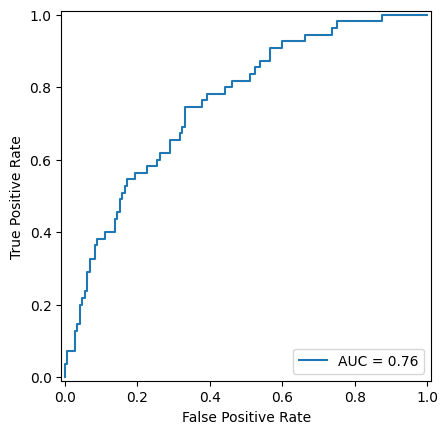

In [44]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()

We can also explore our model a little further. We can look at the coefficients:

In [45]:
# Get coefficients and intercept
coefficients = lr.coef_
intercept = lr.intercept_

# Get feature names
feature_names = lr.feature_names_in_

# Display coefficients alongside feature names

coef_df = pd.DataFrame(coefficients, columns=feature_names)
print("Coefficients:\n", coef_df)
print("Intercept:", intercept)

Coefficients:
    Duration  CreditAmount       Age  CheckingAccountStatus_A12  \
0  0.328026      0.224885 -0.207687                  -0.128976   

   CheckingAccountStatus_A13  CheckingAccountStatus_A14  CreditHistory_A31  \
0                  -0.248657                  -0.826075           -0.01441   

   CreditHistory_A32  CreditHistory_A33  CreditHistory_A34  ...  Purpose_A43  \
0           -0.46941          -0.191025          -0.677958  ...    -0.392911   

   Purpose_A44  Purpose_A45  Purpose_A46  Purpose_A48  Purpose_A49  \
0    -0.009198     0.018594      0.04484    -0.169309    -0.148738   

   SavingsAccountBonds_A62  SavingsAccountBonds_A63  SavingsAccountBonds_A64  \
0                -0.130608                -0.144093                -0.229467   

   SavingsAccountBonds_A65  
0                -0.349722  

[1 rows x 23 columns]
Intercept: [-1.16394581]


We might also want to look at residuals. Residuals in Logistic Regression
Residuals in logistic regression are typically calculated as:

Residual
=
Observed Value
−
Predicted Probability
Residual=Observed Value−Predicted Probability

Goal: The residual plot should show no clear pattern. Patterns might indicate that the model is not capturing some important relationships in the data.

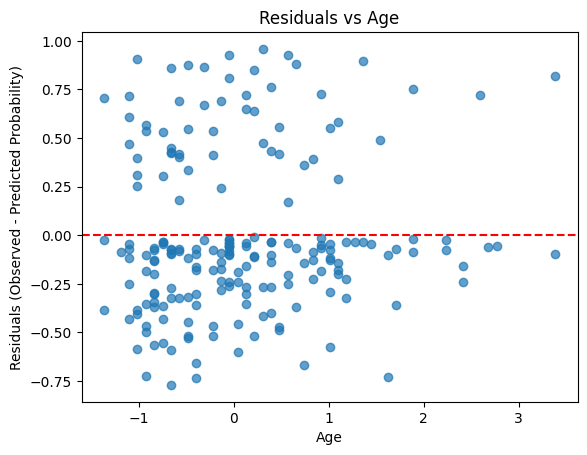

In [46]:
# Calculate residuals
residuals = y_test - y_prob  # Observed - Predicted probabilities

# Choose a feature for plotting residuals
feature = 'Age'
x_axis = X_test[feature]

# Create a residual plot
plt.scatter(x_axis, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.title(f"Residuals vs {feature}")
plt.xlabel(feature)
plt.ylabel("Residuals (Observed - Predicted Probability)")
plt.show()


What to Look For:

**No Pattern:** The points should be randomly scattered around the horizontal line at 0. This indicates the model is fitting well.

**Systematic Patterns:** If the residuals form a curve or other pattern, it might indicate that:


*   A non-linear relationship exists, and a transformation of the feature could help.
*   An interaction term or additional feature may be missing.

**Heteroscedasticity** If the spread of residuals increases or decreases with the feature's value, the model might not be well-calibrated across the range of the feature.
